# Exercise Set 01: Loading, Plotting, and Reasoning About Data

BEE 4850/5850, Fall 2024

**Name**: Anthony Nicolaides

**ID**: ajn68

> **Due Date**
>
> Friday, 2/2/24, 9:00pm

## Overview

### Instructions

The goal of this exercise is for you to practice (or learn how to) load
data from tabular data files, plot it, and do some basic reasoning about
the data and relationships between variables.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [27]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Documents/BEE5850/exercises/ex-week01`


The following packages are included in the environment (to help you find
other similar packages in other languages). The code below loads these
packages for use in the subsequent notebook (the desired functionality
for each package is commented next to the package).

In [5]:
using DataFrames # tabular data structure
using CSV # reads/writes .csv files
using Plots # plotting library
using StatsBase # statistical quantities like mean, median, etc
using StatsPlots # some additional statistical plotting tools

## Problems

The goal of this exercise is for you to visualize and reason about the
relationship between global mean surface temperature and global mean sea
levels.

Problems 1 and 2 are both marked out of 5 points.

### Problem 1

Load the data from the `data/` folder:

-   Global mean temperature data from the HadCRUT 5.0.2.0 dataset
    (<https://hadobs.metoffice.gov.uk/hadcrut5/data/HadCRUT.5.0.2.0/download.html>)
    can be found in
    `data/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv`.
    This data is averaged over the Northern and Southern Hemispheres and
    over the whole year.

    > **Global Mean Temperature Anomalies**
    >
    > Global mean temperatures are typically represented as an *anomaly*
    > from a certain reference or baseline period (in the case of
    > HadCRUT5, the average surface temperature from 1961–1990). The
    > climate change projections used by the Intergovernmental Panel on
    > Climate Change typically use a “pre-industrial” baseline period
    > from the 19th century, though specifics can also change.

-   Global mean sea level anomalies (relative to the 1990 mean global
    sea level) are in `data/CSIRO_Recons_gmsl_yr_2015.csv`, courtesy of
    CSIRO (<https://www.cmar.csiro.au/sealevel/sl_data_cmar.html>).

After loading the data, create a combined data structure (like a
`DataFrame` in Julia or Python/Pandas, or a `data.frame` in R) with
columns corresponding to the year, the estimated global mean temperature
anomaly, and the estimated global mean sea level anomaly. Note that the
years may need some adjustment to get them to match due to decimals.
Then plot the two data series (not necessarily on the same axis; you can
decide how to best present the data).

In [19]:
data_temp = CSV.read("data/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv", DataFrame)
data_sea = CSV.read("data/CSIRO_Recons_gmsl_yr_2015.csv", DataFrame);

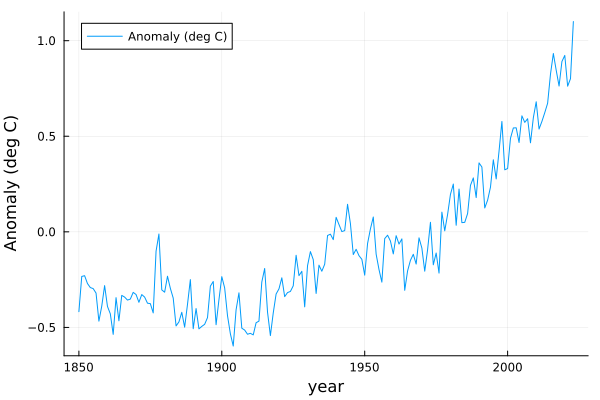

In [25]:
plot(data_temp.Time, data_temp[!, "Anomaly (deg C)"],
    label="Anomaly (deg C)")
xlabel!("year")
ylabel!("Anomaly (deg C)")

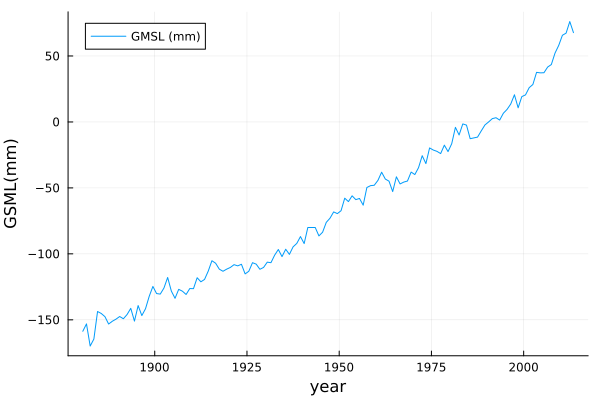

In [26]:
plot(data_sea.Time, data_sea[!, "GMSL (mm)"], label="GMSL (mm)")
xlabel!("year")
ylabel!("GSML(mm)")

### Problem 2

What hypotheses can you draw about the relationship between global mean
temperature and global mean sea level? Explain your reasoning for those
hypotheses (they don’t have to be mechanistically motivated and can be
based on a statistical or visual analysis). Propose two different
mathematical models (which could consist of one or multiple equations)
which encode those hypotheses.

Based on the data, it seems that temperature and sea level have a positive correlation between each other because both has been increasing since the late 1800s. To find correlation between the two, you can use Pearson’s coefficient to fit how the pre-exisitng data correlates with each other, as well as making an autoregressive model to see if the current trend continues.

It could also be that global mean temperature is causing the sea levels to rise, instead of them simply being correlated. This hypothesis cames from the reasoning that as the Earth gets hotter, more ice melts which cause sea levels to increase globally. A mathemathical model to test this hypothesis would be model fitting. For example, modeling global temperatures with an energy balance model and seeing how changes in temperature influences sea levels in the model.

## References